In [4]:

import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib.dates as mdates
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

# example with an 8 qbi register of the effect of arithmetic distribution loading



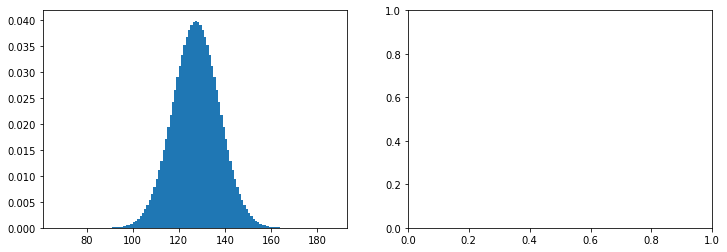

In [5]:
sc = 10
mid = 6 * sc * 2
#mid = 127

x = np.linspace(-6, 6, num = 6 * 2 * sc + 1)
p = norm.pdf(x)
p = p / np.sum(p)
i = x * sc + mid


x_0 = -2
i_0 = x_0 * sc + mid

y = (x * 2 - x_0 * 2 + x_0) * (x <= x_0)

j = (i * 2 - i_0 * 2 + i_0) * (i <= i_0) + i * (i > i_0)


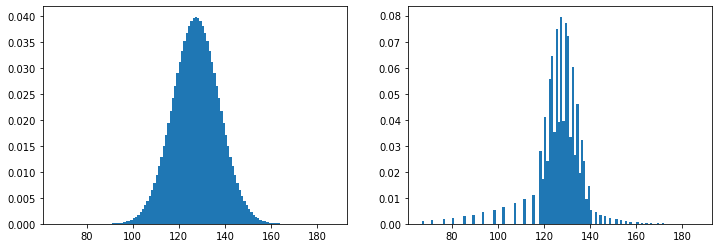

In [9]:
params = np.array([-1.55115971, -0.90659326,  1.89248202,  4.38416021,  0.63446089,
        2.25054579])

def piecewise_linear3(x, x0, y0, rdx0, k0, k1, k2):
    dx0 = rdx0 * rdx0 # use square root of delta as a parameter to keep dx0 > 0
    x1 = x0 + dx0
    y1 = y0 + k1 * dx0 
    return np.piecewise(x, [x < x0, (x >= x0) & (x < x1), x >= x1], [lambda x:k0 * x + y0 - k0 * x0, lambda x:k1 * x + y0 - k1 * x0, lambda x:k2 * x + y1 - k2 * x1])

x2 = piecewise_linear3(x, *params)
i2 = x2 * 10 + 127

fig1, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))
_ = ax1.hist(i, weights = p, bins = i)
_ = ax2.hist(i2, weights = p, bins = i)
#plt.plot(x2, p)